# Fashion MNIST multi-class classification

here we are going to classify differnt types of clothes from each other. <br>
You can read more about the dataset on the following link.<br>
https://www.tensorflow.org/datasets/catalog/fashion_mnist

#### Importing the required modules

In [22]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
tfds.disable_progress_bar()
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


#### Loading the dataset and viewing an example

In [81]:
(ds_train, ds_test), ds_info = tfds.load("fashion_mnist", 
                    split=['train', 'test'],
                    shuffle_files=True,
                    as_supervised=True,
                    with_info=True)

Label: 4


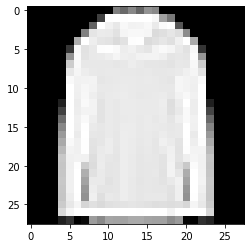

In [82]:
for example in ds_train.take(1):
    image, label = example[0], example[1]
    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    print("Label: %d" % label.numpy())

#### Preparing the dataset as train and test sets

In [83]:
#train set creation

def normalize_image(image, label):
    return tf.cast(image, tf.float32)/255., label

ds_train = ds_train.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits["train"].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

In [84]:
#test set creation
ds_test = ds_test.map(
    normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

#### Callback function for stopping training when desired accuracy is reached and for tensorboard

In [91]:
import datetime

#custom callback for stopping training
class MyCallback(tf.keras.callbacks.Callback):
    #implementing the on_epoch_end function to stop training when accuracy reaches more than 90%
    
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get("accuracy") > 0.95):
            print("Accuracy is greater than 95%. Stopping training!")
            self.model.stop_training = True

#tensorboard callback
logs_dir = ".\logs\\fit\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
board_callback = tf.keras.callbacks.TensorBoard(log_dir=logs_dir)
my_callback = MyCallback()

#### Building the model

In [92]:
model = tf.keras.models.Sequential([
        
        tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
        tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_27 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [93]:
#compiling the model
model.compile(optimizer = "adam",
             loss = "sparse_categorical_crossentropy",
             metrics=['accuracy']
             )

#train the model
model.fit(ds_train,
          epochs = 10,
          validation_data = ds_test,
          verbose = 1,
          callbacks = [my_callback, board_callback])

Epoch 1/10
469/469 [==============================] - 6s 12ms/step - loss: 0.5611 - accuracy: 0.8080 - val_loss: 0.4889 - val_accuracy: 0.8283
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.4108 - accuracy: 0.8559 - val_loss: 0.4493 - val_accuracy: 0.8457
Epoch 3/10
469/469 [==============================] - 15s 31ms/step - loss: 0.3712 - accuracy: 0.8675 - val_loss: 0.4042 - val_accuracy: 0.8606
Epoch 4/10
469/469 [==============================] - 7s 16ms/step - loss: 0.3462 - accuracy: 0.8766 - val_loss: 0.3901 - val_accuracy: 0.8617
Epoch 5/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3237 - accuracy: 0.8832 - val_loss: 0.3781 - val_accuracy: 0.8681
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3076 - accuracy: 0.8879 - val_loss: 0.3908 - val_accuracy: 0.8584
Epoch 7/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2957 - accuracy: 0.8923 - val_loss: 0.3808 - val_accuracy: 0.8627


In [97]:
%tensorboard --logdir=logs/fit

Reusing TensorBoard on port 6006 (pid 5788), started 0:01:03 ago. (Use '!kill 5788' to kill it.)

In [98]:
model.evaluate(ds_test)

     79/Unknown - 1s 8ms/step - loss: 0.3409 - accuracy: 0.8822

[0.3408978571997413, 0.8822]

Training Accuracy: 90.26<br>
Testing Accuracy: 88.22